In [1]:
import sys
sys.path.append("../src")
import numpy as np
import nltk
from nltk.tree import Tree
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
from iparse_vq import IParser
import evaluate
import torch
import torch_struct

In [2]:
# iparse = IParser("../models/en_label_gpt2_medium_cat256")
iparse = IParser("../models/32.pt")
d_model = 32

Some weights of GPT2Model were not initialized from the model checkpoint at gpt2-medium and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias', 'h.12.attn.masked_bias', 'h.13.attn.masked_bias', 'h.14.attn.masked_bias', 'h.15.attn.masked_bias', 'h.16.attn.masked_bias', 'h.17.attn.masked_bias', 'h.18.attn.masked_bias', 'h.19.attn.masked_bias', 'h.20.attn.masked_bias', 'h.21.attn.masked_bias', 'h.22.attn.masked_bias', 'h.23.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
dev_treebank = iparse.load_dev()

In [4]:
dev_predicted_and_cats, encoded = iparse.parser.parse(
    dev_treebank.without_gold_annotations(),
    subbatch_max_tokens=500,
    tau=0.0,
    return_cats=True,
    return_encoded=True
)

/Users/thomas/anaconda3/lib/python3.8/site-packages/torch/distributions/distribution.py:44: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(f'{self.__class__} does not define `arg_constraints`. ' +


In [5]:
matrix = np.zeros((d_model, d_model))
# matrix[first tag][second tag]
for i, (tree, cats) in enumerate(dev_predicted_and_cats):
    prev = None
    for tok in cats:
        if prev is not None:
            matrix[prev][tok] += 1
        prev = tok


In [12]:

labels_count = []

for i in range(32):
    for j in range(32):
        labels_count.append((f"{i}, {j}", matrix[i][j]))
labels_count2 = sorted(labels_count, key=lambda x: x[1])

labels, counts = [label for i, (label, count) in enumerate(labels_count2)], [count for label, count in labels_count2]

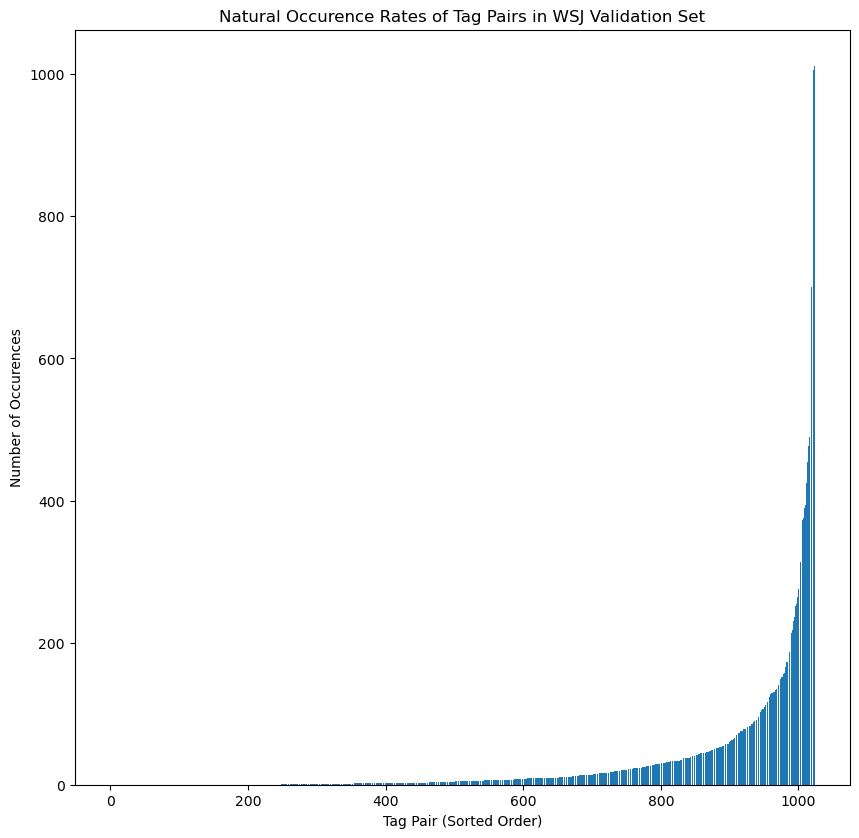

In [16]:
fig = plt.figure(figsize=(10, 10), dpi=100)
plt.bar(range(len(counts)), counts)
plt.ylabel('Number of Occurences')
plt.xlabel('Tag Pair (Sorted Order)')
plt.title('Natural Occurence Rates of Tag Pairs in WSJ Validation Set')
plt.show()

In [8]:
counts = np.array(counts)
np.sum(counts <= 1) / len(counts)

0.3466796875

In [9]:
np.sum(counts == 0) / len(counts)

0.2421875